In [1]:
#installation
!pip install mysql-connector

In [2]:
#import packages
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
#code
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "Manikanta1213@",
    database = "healthcare",
    auth_plugin = "mysql_native_password",
    use_pure = True
)
mycursor = db.cursor()
print(db)

In [4]:
#for authentication error
!pip install --upgrade mysql-connector-python
#STEPS TO DO AFTER INSTALL UPGRADE CONNECTOR
#1)open command line client
#2)type password
#3)type this : ALTER USER "your username"@"your host" IDENTIFIED WITH mysql_native_password BY "your_password"; and enter
#4)type this : FLUSH PRIVILEGES; and enter thats it


In [370]:
# to retrive all data from patients table
mycursor.execute("select * from patients")
output = mycursor.fetchall()
for x in output:
   print(x)
            

(1, 'Aarav', 'Sharma', '1995-05-12', 'Male', 29, 'O+', 'Asthma', datetime.date(2024, 12, 15), 'Admitted')
(2, 'Isha', 'Patel', '1990-08-25', 'Female', 34, 'A+', 'Diabetes', datetime.date(2024, 12, 10), 'Under Treatment')
(3, 'Ravi', 'Singh', '1983-04-19', 'Male', 41, 'B+', 'Heart Disease', datetime.date(2024, 12, 20), 'Admitted')
(4, 'Neha', 'Reddy', '1996-02-14', 'Female', 28, 'AB+', 'Thyroid', datetime.date(2024, 12, 12), 'Under Treatment')
(5, 'Manish', 'Kumar', '1988-10-30', 'Male', 36, 'O-', 'Pneumonia', datetime.date(2024, 12, 18), 'Admitted')
(6, 'Kavya', 'Gupta', '1992-11-05', 'Female', 32, 'B-', 'Cancer', datetime.date(2024, 12, 17), 'Under Treatment')
(7, 'Varun', 'Mehta', '1997-06-02', 'Male', 27, 'AB-', 'Arthritis', datetime.date(2024, 12, 14), 'Discharged')
(8, 'Priya', 'Verma', '1985-07-16', 'Female', 39, 'A-', 'Kidney Failure', datetime.date(2024, 12, 13), 'Under Treatment')
(9, 'Rahul', 'Joshi', '1993-03-21', 'Male', 31, 'O+', 'Stroke', datetime.date(2024, 12, 11), 'Adm

In [374]:
#convert data into dataframe
query = "select * from patients"
data = pd.read_sql(query,db)
data.head()

,Patient_ID,Fisrt_Name,Last_Name,Date_Of_Birth,Gender,Age,Blood_Group,Disease,Admission_Date,Status
0,1,Aarav,Sharma,1995-05-12,Male,29,O+,Asthma,2024-12-15,Admitted
1,2,Isha,Patel,1990-08-25,Female,34,A+,Diabetes,2024-12-10,Under Treatment
2,3,Ravi,Singh,1983-04-19,Male,41,B+,Heart Disease,2024-12-20,Admitted
3,4,Neha,Reddy,1996-02-14,Female,28,AB+,Thyroid,2024-12-12,Under Treatment
4,5,Manish,Kumar,1988-10-30,Male,36,O-,Pneumonia,2024-12-18,Admitted


In [376]:
#describe
data.describe()

,Patient_ID,Age
count,1000.000000,1000.000000
mean,500.500000,32.745000
std,288.819436,2.997826
min,1.000000,25.000000
25%,250.750000,30.000000
50%,500.500000,32.000000
75%,750.250000,35.000000
max,1000.000000,44.000000


In [378]:
#info of file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      1000 non-null   int64 
 1   Fisrt_Name      1000 non-null   object
 2   Last_Name       1000 non-null   object
 3   Date_Of_Birth   1000 non-null   object
 4   Gender          1000 non-null   object
 5   Age             1000 non-null   int64 
 6   Blood_Group     1000 non-null   object
 7   Disease         998 non-null    object
 8   Admission_Date  999 non-null    object
 9   Status          868 non-null    object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [380]:
#shape of table and finding null values 
print(data.shape)
data.isnull().sum()

(1000, 10)


Patient_ID          0
Fisrt_Name          0
Last_Name           0
Date_Of_Birth       0
Gender              0
Age                 0
Blood_Group         0
Disease             2
Admission_Date      1
Status            132
dtype: int64

In [382]:
#filling null values
data.fillna(method = "ffill", inplace = True)
print(data.shape)
data.isnull().sum()

(1000, 10)


Patient_ID        0
Fisrt_Name        0
Last_Name         0
Date_Of_Birth     0
Gender            0
Age               0
Blood_Group       0
Disease           0
Admission_Date    0
Status            0
dtype: int64

In [384]:
#1)How does the patient_id correlate with the patient age?

df = data[['Patient_ID','Age']].corr()
df

,Patient_ID,Age
Patient_ID,1.00000,-0.02881
Age,-0.02881,1.00000


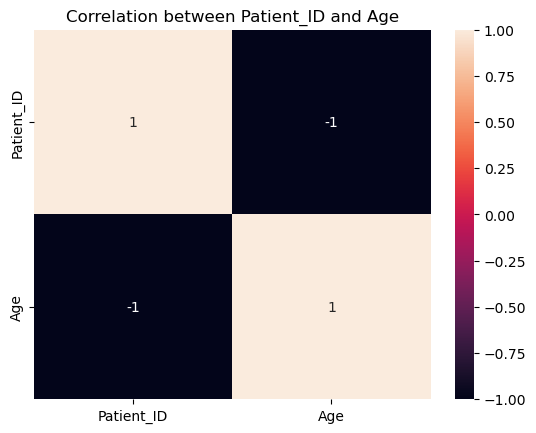

In [386]:
sn.heatmap(df.corr(),annot = True)
plt.title("Correlation between Patient_ID and Age")
plt.show()

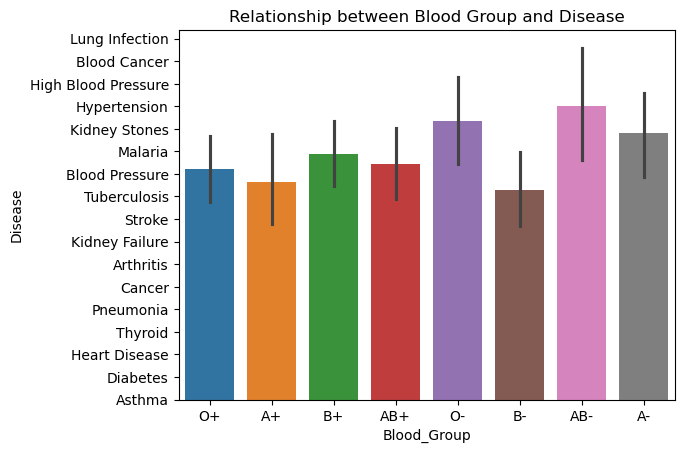

In [388]:
#2)Is there a relationship between blood group and disease?
sn.barplot(data, x = "Blood_Group", y = "Disease", hue = "Blood_Group")
plt.title("Relationship between Blood Group and Disease")
plt.gca().invert_yaxis()
plt.show()

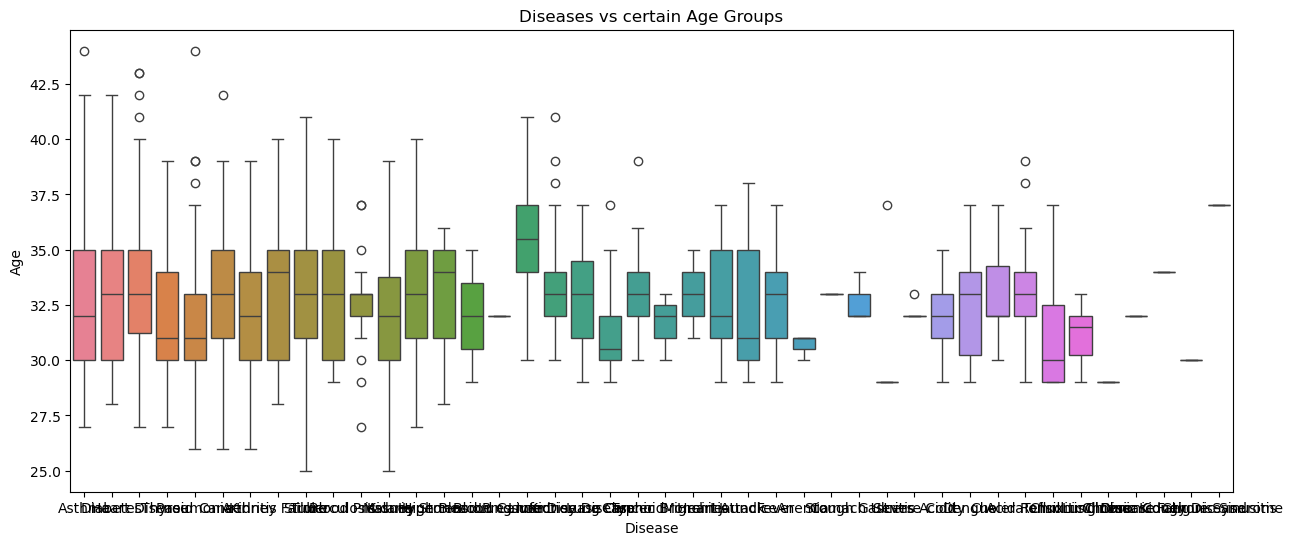

In [390]:
#3) Are there any diseases that tend to affect certain age groups?
plt.figure(figsize = (15,6))
sn.boxplot(data,x = "Disease",y = "Age",hue = "Disease")
plt.title("Diseases vs certain Age Groups")
plt.show()

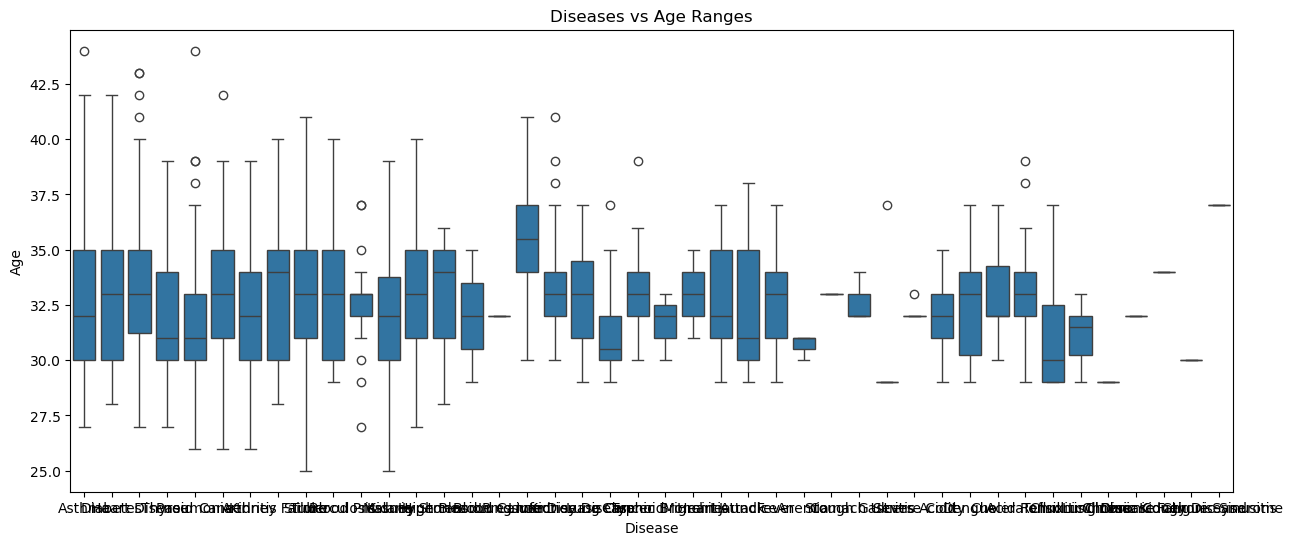

In [392]:
#4) What diseases are more common in certain age ranges?
plt.figure(figsize = (15,6))
sn.boxplot(data, x = "Disease", y = "Age")
plt.title("Diseases vs Age Ranges")
plt.show()

In [394]:
#to retrive all data from doctors table
mycursor.execute("select * from doctors")
output = mycursor.fetchall()
for x in output:
    print(x)

(1, 'Amit', 'Sharma', 'Cardiologist', 9876543210, 'amit.sharma@email.com', 'Bengaluru, Karnataka', datetime.date(1985, 6, 12), 'Male', datetime.date(2010, 1, 1), 'Yes')
(2, 'Priya', 'Patel', 'Orthopedic', 9876543211, 'priya.patel@email.com', 'Surat, Gujarat', datetime.date(1990, 7, 22), 'Female', datetime.date(2013, 5, 15), 'Yes')
(3, 'Vikram', 'Gupta', 'Neurologist', 9876543212, 'vikram.gupta@email.com', 'Jaipur, Rajasthan', datetime.date(1980, 2, 14), 'Male', datetime.date(2008, 11, 20), None)
(4, 'Snehal', 'Reddy', 'Pediatrician', 9876543213, 'snehal.reddy@email.com', 'Hyderabad, Telangana', datetime.date(1995, 10, 28), 'Female', datetime.date(2020, 7, 5), 'Yes')
(5, 'Ravi', 'Kumar', 'General Physician', 9876543214, 'ravi.kumar@email.com', 'Patna, Bihar', datetime.date(1983, 12, 18), 'Male', datetime.date(2012, 2, 20), 'Yes')
(6, 'Tanya', 'Bansal', 'Dentist', 9876543215, 'tanya.bansal@email.com', 'Chandigarh, Chandigarh', datetime.date(1992, 4, 30), 'Female', datetime.date(2018, 6, 

In [396]:
#convert all data into dataframe
query = "select * from doctors"
data = pd.read_sql(query,db)
data.head()

,Doctor_ID,First_Name,Last_Name,Specialization,Phone_Number,Email,Address,Date_Of_Birth,Gender,Join_Date,Is_Active
0,1,Amit,Sharma,Cardiologist,9876543210,amit.sharma@email.com,"Bengaluru, Karnataka",1985-06-12,Male,2010-01-01,Yes
1,2,Priya,Patel,Orthopedic,9876543211,priya.patel@email.com,"Surat, Gujarat",1990-07-22,Female,2013-05-15,Yes
2,3,Vikram,Gupta,Neurologist,9876543212,vikram.gupta@email.com,"Jaipur, Rajasthan",1980-02-14,Male,2008-11-20,None
3,4,Snehal,Reddy,Pediatrician,9876543213,snehal.reddy@email.com,"Hyderabad, Telangana",1995-10-28,Female,2020-07-05,Yes
4,5,Ravi,Kumar,General Physician,9876543214,ravi.kumar@email.com,"Patna, Bihar",1983-12-18,Male,2012-02-20,Yes


In [398]:
#describe the table
data.describe()

,Doctor_ID,Phone_Number
count,200.000000,2.000000e+02
mean,100.500000,9.876543e+09
std,57.879185,1.165447e+01
min,1.000000,9.876543e+09
25%,50.750000,9.876543e+09
50%,100.500000,9.876543e+09
75%,150.250000,9.876543e+09
max,200.000000,9.876543e+09


In [400]:
#information of table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Doctor_ID       200 non-null    int64 
 1   First_Name      200 non-null    object
 2   Last_Name       200 non-null    object
 3   Specialization  200 non-null    object
 4   Phone_Number    200 non-null    int64 
 5   Email           200 non-null    object
 6   Address         200 non-null    object
 7   Date_Of_Birth   200 non-null    object
 8   Gender          200 non-null    object
 9   Join_Date       200 non-null    object
 10  Is_Active       146 non-null    object
dtypes: int64(2), object(9)
memory usage: 17.3+ KB


In [402]:
#shape of table
data.shape

(200, 11)

In [404]:
#column names in table
data.columns

Index(['Doctor_ID', 'First_Name', 'Last_Name', 'Specialization',
       'Phone_Number', 'Email', 'Address', 'Date_Of_Birth', 'Gender',
       'Join_Date', 'Is_Active'],
      dtype='object')

In [406]:
#finding null values in table
data.isnull().sum()

Doctor_ID          0
First_Name         0
Last_Name          0
Specialization     0
Phone_Number       0
Email              0
Address            0
Date_Of_Birth      0
Gender             0
Join_Date          0
Is_Active         54
dtype: int64

In [408]:
#filling null values
data.fillna(method = "ffill", inplace = True)
data.isnull().sum()

Doctor_ID         0
First_Name        0
Last_Name         0
Specialization    0
Phone_Number      0
Email             0
Address           0
Date_Of_Birth     0
Gender            0
Join_Date         0
Is_Active         0
dtype: int64

In [410]:
#shape of table after filing null values
print(data.shape)

(200, 11)


In [412]:
#1)What is the distribution of doctors by specialization?
df = data["Specialization"].value_counts().reset_index()
df

,Specialization,count
0,Pediatrician,29
1,Cardiologist,25
2,General Physician,24
3,Orthopedic,20
4,Psychiatrist,20
5,Neurologist,19
6,Dentist,19
7,Dermatologist,15
8,Gynecologist,15
9,Obstetrician,14


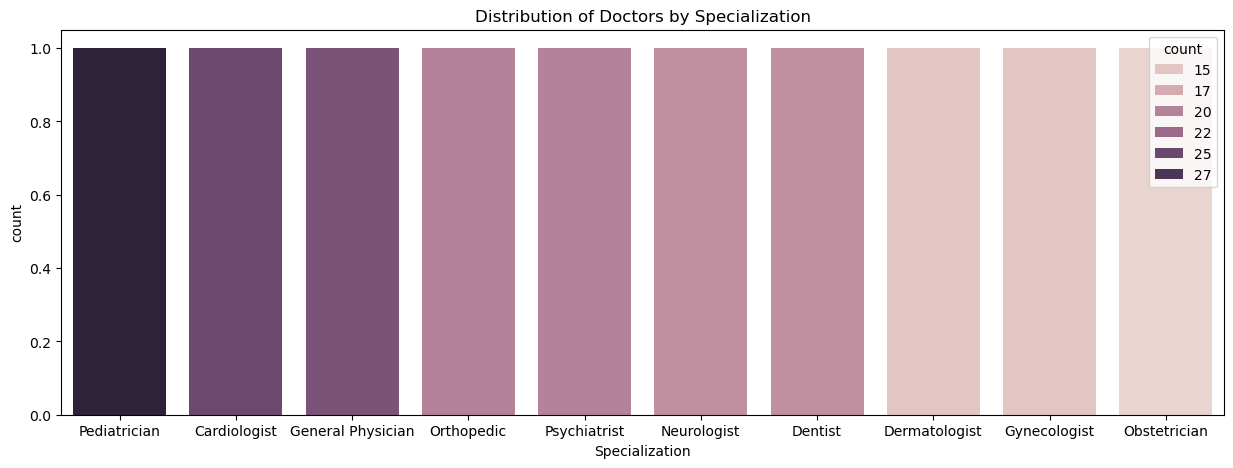

In [27]:
plt.figure(figsize = (15,5))
sn.countplot(data = df, x = "Specialization", hue = "count")
plt.title("Distribution of Doctors by Specialization")
plt.show()

In [416]:
#2)How does gender vary across different specializations?
df = data[["Gender","Specialization"]].value_counts().reset_index()
df

,Gender,Specialization,count
0,Male,General Physician,24
1,Male,Cardiologist,15
2,Male,Pediatrician,15
3,Female,Orthopedic,15
4,Male,Dentist,14
5,Female,Neurologist,14
6,Female,Obstetrician,14
7,Female,Pediatrician,14
8,Male,Gynecologist,10
9,Male,Dermatologist,10


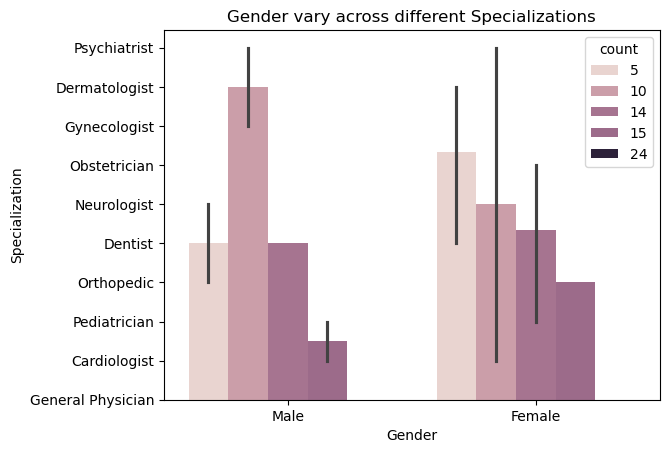

In [420]:
sn.barplot(data = df,y='Specialization', x='Gender', hue = 'count')
plt.title("Gender vary across different Specializations")
plt.gca().invert_yaxis()
plt.show()

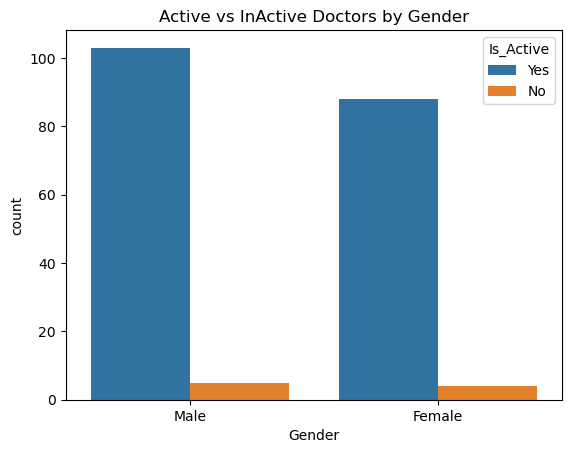

In [422]:
 #3) Is there a difference in the number of active vs inactive doctors by gender?
sn.countplot(data, x = "Gender", hue = "Is_Active")
plt.title("Active vs InActive Doctors by Gender")
plt.show()

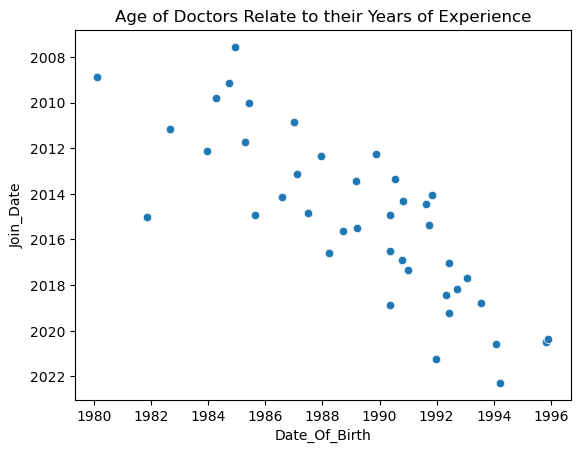

In [424]:
#4)How does the age of a doctor relate to their years of experience?
sn.scatterplot(data, x = "Date_Of_Birth", y = "Join_Date")
plt.title("Age of Doctors Relate to their Years of Experience")
plt.show()

In [428]:
#retrive all data from employees table
mycursor.execute("select * from employees")
output = mycursor.fetchall()
for x in output:
    print(x)

(1, 'Amit', 'Sharma', datetime.date(1980, 6, 15), 'MALE', 'Doctor', 'Cardiology', datetime.date(2010, 4, 20), Decimal('80000.00'), '9876543210', 'Mumbai, Maharashtra', 'Day', 'Active', 'MUM12345', 'Full-Time')
(2, 'Priya', 'Verma', datetime.date(1985, 9, 25), 'FEMALE', 'Nurse', 'General', datetime.date(2015, 8, 12), Decimal('35000.00'), '9876543211', 'Delhi, Delhi', 'Night', 'On Leave', 'DEL67890', 'Part-Time')
(3, 'Rajesh', 'Patel', datetime.date(1992, 12, 5), 'MALE', 'Receptionist', 'Administration', datetime.date(2018, 2, 1), Decimal('25000.00'), '9876543212', 'Ahmedabad, Gujarat', 'Day', 'Active', 'GUJ11223', 'Full-Time')
(4, 'Sushila', 'Reddy', datetime.date(1988, 7, 10), 'FEMALE', 'Doctor', 'Pediatrics', datetime.date(2012, 1, 10), Decimal('90000.00'), '9876543213', 'Hyderabad, Telangana', 'Day', 'Active', 'TEL23456', 'Full-Time')
(5, 'Kunal', 'Gupta', datetime.date(1987, 3, 20), 'MALE', 'Surgeon', 'Orthopedics', datetime.date(2011, 6, 18), Decimal('95000.00'), '9876543214', 'Che

In [430]:
#convert all data into dataframe
query = "select * from employees"
data = pd.read_sql(query,db)
data.head()

,Employee_ID,First_Name,Last_Name,Date_Of_Birth,Gender,Job_Title,Department,Date_Hired,Salary,Phone_Number,Address,Shift,Status,LicenseNumber,EmploymentType
0,1,Amit,Sharma,1980-06-15,MALE,Doctor,Cardiology,2010-04-20,80000.0,9876543210,"Mumbai, Maharashtra",Day,Active,MUM12345,Full-Time
1,2,Priya,Verma,1985-09-25,FEMALE,Nurse,General,2015-08-12,35000.0,9876543211,"Delhi, Delhi",Night,On Leave,DEL67890,Part-Time
2,3,Rajesh,Patel,1992-12-05,MALE,Receptionist,Administration,2018-02-01,25000.0,9876543212,"Ahmedabad, Gujarat",Day,Active,GUJ11223,Full-Time
3,4,Sushila,Reddy,1988-07-10,FEMALE,Doctor,Pediatrics,2012-01-10,90000.0,9876543213,"Hyderabad, Telangana",Day,Active,TEL23456,Full-Time
4,5,Kunal,Gupta,1987-03-20,MALE,Surgeon,Orthopedics,2011-06-18,95000.0,9876543214,"Chennai, Tamil Nadu",Night,Active,TAM56789,Full-Time


In [432]:
#describe the table
data.describe()

,Employee_ID,Salary
count,500.000000,500.000000
mean,250.500000,56180.000000
std,144.481833,31784.904598
min,1.000000,24000.000000
25%,125.750000,32000.000000
50%,250.500000,35000.000000
75%,375.250000,92000.000000
max,500.000000,125000.000000


In [434]:
#information of table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Employee_ID     500 non-null    int64  
 1   First_Name      500 non-null    object 
 2   Last_Name       500 non-null    object 
 3   Date_Of_Birth   500 non-null    object 
 4   Gender          500 non-null    object 
 5   Job_Title       500 non-null    object 
 6   Department      500 non-null    object 
 7   Date_Hired      500 non-null    object 
 8   Salary          500 non-null    float64
 9   Phone_Number    500 non-null    object 
 10  Address         500 non-null    object 
 11  Shift           500 non-null    object 
 12  Status          500 non-null    object 
 13  LicenseNumber   412 non-null    object 
 14  EmploymentType  500 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 58.7+ KB


In [436]:
#shape of table
data.shape

(500, 15)

In [438]:
#column names in table
data.columns

Index(['Employee_ID', 'First_Name', 'Last_Name', 'Date_Of_Birth', 'Gender',
       'Job_Title', 'Department', 'Date_Hired', 'Salary', 'Phone_Number',
       'Address', 'Shift', 'Status', 'LicenseNumber', 'EmploymentType'],
      dtype='object')

In [440]:
#finding null values
data.isnull().sum()

Employee_ID        0
First_Name         0
Last_Name          0
Date_Of_Birth      0
Gender             0
Job_Title          0
Department         0
Date_Hired         0
Salary             0
Phone_Number       0
Address            0
Shift              0
Status             0
LicenseNumber     88
EmploymentType     0
dtype: int64

In [442]:
#filling null values
data.fillna(method = "ffill",inplace = True)

In [444]:
#finding null values after filling null values
data.isnull().sum()

Employee_ID       0
First_Name        0
Last_Name         0
Date_Of_Birth     0
Gender            0
Job_Title         0
Department        0
Date_Hired        0
Salary            0
Phone_Number      0
Address           0
Shift             0
Status            0
LicenseNumber     0
EmploymentType    0
dtype: int64

In [446]:
#shape of table after filling null values
data.shape

(500, 15)

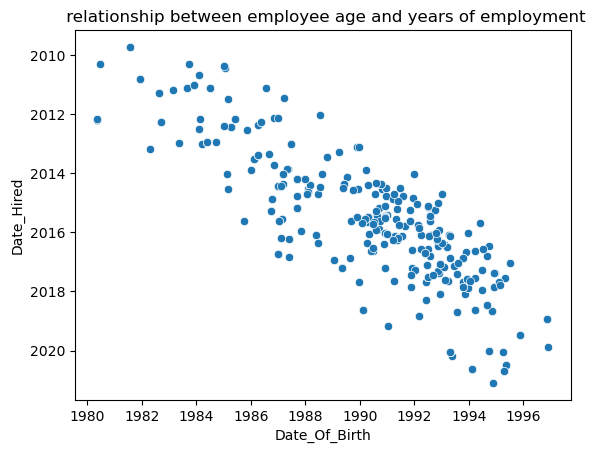

In [450]:
#1) What is the relationship between employee age and years of employment?
sn.scatterplot(data, x = 'Date_Of_Birth', y = 'Date_Hired')
plt.title(' relationship between employee age and years of employment')
plt.show()

In [454]:
#2) How are employees distributed across different job titles?
df = data['Job_Title'].value_counts().reset_index()
df

,Job_Title,count
0,Technician,140
1,Nurse,119
2,Doctor,117
3,Surgeon,58
4,Pharmacist,47
5,Receptionist,15
6,Medical Assistant,4


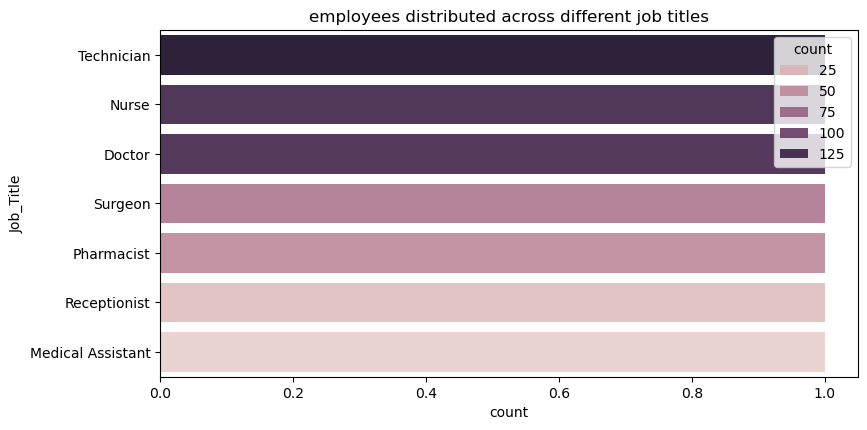

In [456]:
plt.figure(figsize = (9,4.5))
sn.countplot(df,y = 'Job_Title',hue ='count')
plt.title('employees distributed across different job titles')
plt.show()

In [458]:
#3) Are employees in certain departments more likely to be active or inactive?
df = data[['Department','Status']].value_counts().reset_index()
df.head()

,Department,Status,count
0,Orthopedics,Active,53
1,Cardiology,Active,43
2,Surgery,Active,39
3,Radiology,Active,38
4,Pharmacy,Active,37


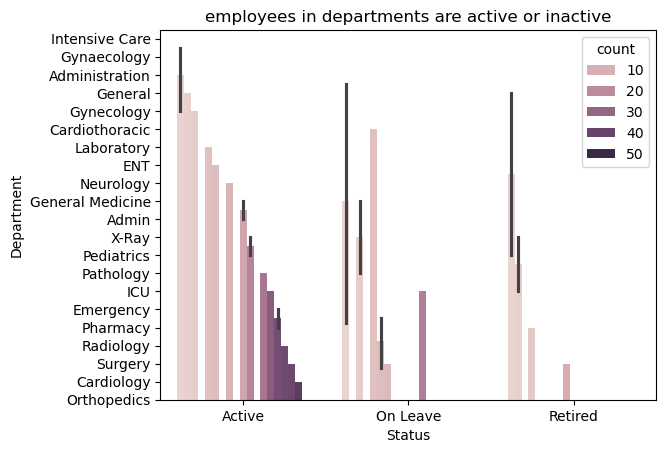

In [460]:
sn.barplot(data = df,x = 'Status', y = 'Department', hue = 'count')
plt.gca().invert_yaxis()
plt.title('employees in departments are active or inactive')
plt.show()

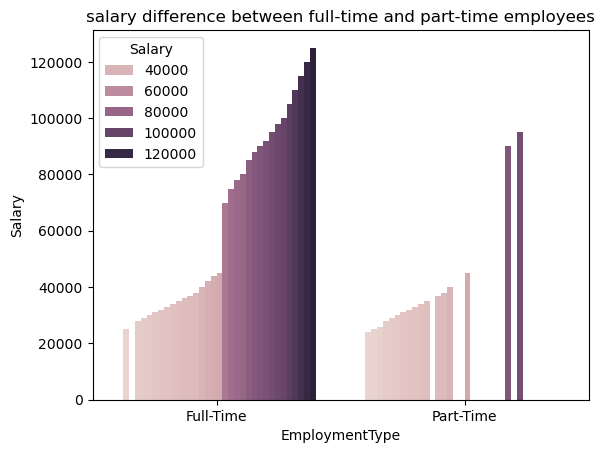

In [462]:
#4) What is the salary difference between full-time and part-time employees?
sn.barplot(data,x = 'EmploymentType', y = 'Salary',hue = 'Salary')
plt.title('salary difference between full-time and part-time employees')
plt.show()

In [463]:
#retrive all data from parking table
mycursor.execute("select * from parking")
output = mycursor.fetchall()
for x in output:
    print(x)

(1, 'MH01AB1234', 'Car', 5, datetime.datetime(2024, 12, 10, 8, 0), datetime.datetime(2024, 12, 10, 10, 0), datetime.timedelta(seconds=7200), 'Employee', 'Paid', Decimal('50.00'))
(2, 'UP14XY5678', 'Truck', 12, datetime.datetime(2024, 12, 11, 9, 0), datetime.datetime(2024, 12, 11, 12, 0), datetime.timedelta(seconds=10800), 'Visitor', 'Paid', Decimal('150.00'))
(3, 'DL3CB1234', 'Motorcycle', 7, datetime.datetime(2024, 12, 12, 8, 30), datetime.datetime(2024, 12, 12, 10, 15), datetime.timedelta(seconds=6300), 'General', 'Paid', Decimal('20.00'))
(4, 'TN01AB0001', 'Car', 3, datetime.datetime(2024, 12, 13, 7, 45), datetime.datetime(2024, 12, 13, 9, 30), datetime.timedelta(seconds=6300), 'Employee', 'Paid', Decimal('40.00'))
(5, 'KL04XY2345', 'Ambulance', 15, datetime.datetime(2024, 12, 14, 8, 0), datetime.datetime(2024, 12, 14, 12, 0), datetime.timedelta(seconds=14400), 'Others', 'Unpaid', Decimal('0.00'))
(6, 'KA03CD6789', 'Mini-Ambulance', 20, datetime.datetime(2024, 12, 15, 6, 30), dateti

In [466]:
#convert all data into dataframe
query = "select * from parking"
data = pd.read_sql(query,db)
data.head()

,Parking_ID,Vehicle_ID,Vehicle_Type,Parking_Spot,Entry_Time,Exit_Time,Total_Duration,Parking_Type,Payment_Status,Cost
0,1,MH01AB1234,Car,5,2024-12-10 08:00:00,2024-12-10 10:00:00,0 days 02:00:00,Employee,Paid,50.0
1,2,UP14XY5678,Truck,12,2024-12-11 09:00:00,2024-12-11 12:00:00,0 days 03:00:00,Visitor,Paid,150.0
2,3,DL3CB1234,Motorcycle,7,2024-12-12 08:30:00,2024-12-12 10:15:00,0 days 01:45:00,General,Paid,20.0
3,4,TN01AB0001,Car,3,2024-12-13 07:45:00,2024-12-13 09:30:00,0 days 01:45:00,Employee,Paid,40.0
4,5,KL04XY2345,Ambulance,15,2024-12-14 08:00:00,2024-12-14 12:00:00,0 days 04:00:00,Others,Unpaid,0.0


In [468]:
#describe the table
data.describe()

,Parking_ID,Parking_Spot,Entry_Time,Exit_Time,Total_Duration,Cost
count,2000.000000,2000.000000,2000,2000,2000,1959.000000
mean,1000.500000,153.088500,2024-12-14 06:10:51.600000,2024-12-14 08:08:10.949999872,0 days 01:58:02.550000,129.172537
min,1.000000,1.000000,2024-11-01 07:00:00,2024-11-01 09:00:00,0 days 00:45:00,0.000000
25%,500.750000,20.000000,2024-12-03 08:00:00,2024-12-03 10:00:00,0 days 02:00:00,90.000000
50%,1000.500000,46.000000,2024-12-14 08:00:00,2024-12-14 10:00:00,0 days 02:00:00,125.000000
75%,1500.250000,232.000000,2024-12-28 09:30:00,2024-12-28 11:30:00,0 days 02:00:00,160.000000
max,2000.000000,816.000000,2025-01-19 09:50:00,2025-01-19 11:50:00,0 days 04:00:00,320.000000
std,577.494589,184.886152,NaN,NaN,0 days 00:16:07.258130824,60.758214


In [470]:
#information of table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Parking_ID      2000 non-null   int64          
 1   Vehicle_ID      2000 non-null   object         
 2   Vehicle_Type    2000 non-null   object         
 3   Parking_Spot    2000 non-null   int64          
 4   Entry_Time      2000 non-null   datetime64[ns] 
 5   Exit_Time       2000 non-null   datetime64[ns] 
 6   Total_Duration  2000 non-null   timedelta64[ns]
 7   Parking_Type    2000 non-null   object         
 8   Payment_Status  1830 non-null   object         
 9   Cost            1959 non-null   float64        
dtypes: datetime64[ns](2), float64(1), int64(2), object(4), timedelta64[ns](1)
memory usage: 156.4+ KB


In [472]:
#shape of table
data.shape

(2000, 10)

In [474]:
#finding null values
data.isnull().sum()

Parking_ID          0
Vehicle_ID          0
Vehicle_Type        0
Parking_Spot        0
Entry_Time          0
Exit_Time           0
Total_Duration      0
Parking_Type        0
Payment_Status    170
Cost               41
dtype: int64

In [476]:
#filling null values
data.fillna(method = "ffill", inplace = True)
data.isnull().sum()

Parking_ID        0
Vehicle_ID        0
Vehicle_Type      0
Parking_Spot      0
Entry_Time        0
Exit_Time         0
Total_Duration    0
Parking_Type      0
Payment_Status    0
Cost              0
dtype: int64

In [478]:
#shape of table after filling null values
data.shape

(2000, 10)

In [480]:
#columms in table
data.columns

Index(['Parking_ID', 'Vehicle_ID', 'Vehicle_Type', 'Parking_Spot',
       'Entry_Time', 'Exit_Time', 'Total_Duration', 'Parking_Type',
       'Payment_Status', 'Cost'],
      dtype='object')

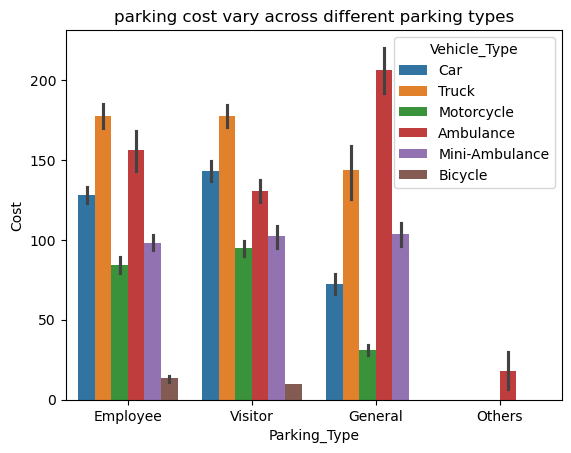

In [482]:
#1) How does parking cost vary across different parking types?
sn.barplot(data,x = 'Parking_Type',y = 'Cost',hue = 'Vehicle_Type')
plt.title('parking cost vary across different parking types')
plt.show()

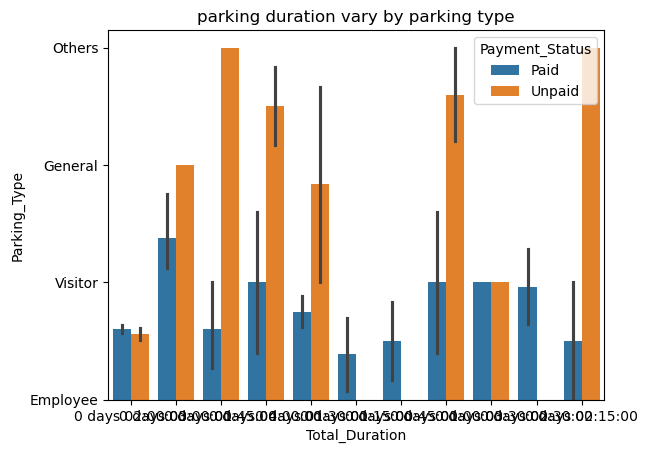

In [484]:
#2) How does parking duration vary by parking type?
sn.barplot(data,x = 'Total_Duration',y = 'Parking_Type',hue = 'Payment_Status')
plt.gca().invert_yaxis()
plt.title('parking duration vary by parking type')
plt.show()

In [486]:
#3) Is there any correlation between parking duration and cost?
df = data[['Total_Duration','Cost']].corr()
df

,Total_Duration,Cost
Total_Duration,1.000000,0.229846
Cost,0.229846,1.000000


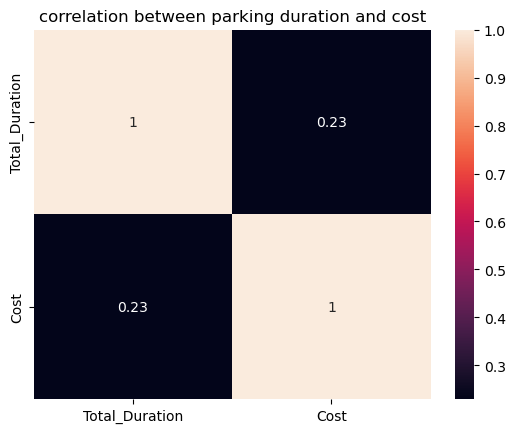

In [488]:
sn.heatmap(df,annot = True)
plt.title('correlation between parking duration and cost')
plt.show()

In [490]:
#4) What is the average parking duration by vehicle type?
df = data.groupby('Vehicle_Type')['Total_Duration'].mean().reset_index()
df

,Vehicle_Type,Total_Duration
0,Ambulance,0 days 02:02:30
1,Bicycle,0 days 01:00:00
2,Car,0 days 01:59:34.371859296
3,Mini-Ambulance,0 days 01:53:41.379310344
4,Motorcycle,0 days 01:52:22.806394316
5,Truck,0 days 02:02:57.022058823


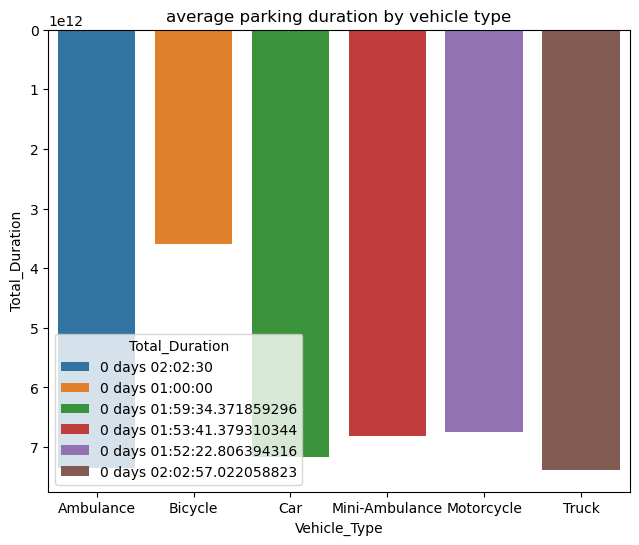

In [492]:
plt.figure(figsize = (7.5,6))
sn.barplot(df,x = 'Vehicle_Type', y = 'Total_Duration',hue = 'Total_Duration')
plt.title('average parking duration by vehicle type')
plt.show()

In [494]:
#retrive all data from op table
mycursor.execute("select * from op")
output = mycursor.fetchall()
for x in output:
    print(x)

(1, 11, 101, datetime.datetime(2024, 12, 11, 9, 0), 'Spinal Surgery', 'Spinal Disc Herniation', 'Successful', 'Spinal', 'Recovery in progress', 180, 'Completed')
(2, 12, 102, datetime.datetime(2024, 12, 12, 10, 0), 'C-section', 'Multiple Births', 'Successful', 'General', 'Mother and babies doing well', 80, 'Completed')
(3, 13, 103, datetime.datetime(2024, 12, 13, 11, 30), 'Knee Replacement', 'Knee Osteoarthritis', 'Successful', 'General', None, 100, 'Completed')
(4, 14, 104, datetime.datetime(2024, 12, 14, 14, 0), 'Heart Surgery', 'Coronary Artery Disease', 'Complications', 'Spinal', None, 150, 'Cancelled')
(5, 15, 105, datetime.datetime(2024, 12, 15, 12, 15), 'Gallbladder Removal', 'Gallstones', 'Successful', 'Spinal', 'Stable post-op', 70, 'Completed')
(6, 16, 106, datetime.datetime(2024, 12, 16, 9, 45), 'Hip Replacement', 'Hip Arthritis', 'Successful', 'Spinal', 'No complications', 120, 'Completed')
(7, 17, 107, datetime.datetime(2024, 12, 17, 10, 0), 'Laparoscopy', 'Ovarian Cysts',

In [496]:
#convert all data into dataframe
query = "select * from op"
data = pd.read_sql(query,db)
data.head()

,Operation_ID,Patient_ID,Surgeon_ID,Operation_Date,Operation_Type,Diagnosis,Outcome,Anesthesia_type,Notes,Operation_duration,Status
0,1,11,101,2024-12-11 09:00:00,Spinal Surgery,Spinal Disc Herniation,Successful,Spinal,Recovery in progress,180,Completed
1,2,12,102,2024-12-12 10:00:00,C-section,Multiple Births,Successful,General,Mother and babies doing well,80,Completed
2,3,13,103,2024-12-13 11:30:00,Knee Replacement,Knee Osteoarthritis,Successful,General,None,100,Completed
3,4,14,104,2024-12-14 14:00:00,Heart Surgery,Coronary Artery Disease,Complications,Spinal,None,150,Cancelled
4,5,15,105,2024-12-15 12:15:00,Gallbladder Removal,Gallstones,Successful,Spinal,Stable post-op,70,Completed


In [498]:
#describe the table
data.describe()

,Operation_ID,Patient_ID,Surgeon_ID,Operation_Date,Operation_duration
count,777.000000,777.000000,777.000000,777,777.000000
mean,389.000000,399.000000,489.000000,2025-07-01 06:37:03.938223872,143.153153
min,1.000000,11.000000,101.000000,2024-12-01 08:00:00,40.000000
25%,195.000000,205.000000,295.000000,2025-03-02 09:15:00,90.000000
50%,389.000000,399.000000,489.000000,2025-06-20 17:00:00,135.000000
75%,583.000000,593.000000,683.000000,2025-10-16 09:45:00,200.000000
max,777.000000,787.000000,877.000000,2026-04-29 17:00:00,300.000000
std,224.444871,224.444871,224.444871,NaN,61.919206


In [500]:
#information of table
data.info

<bound method DataFrame.info of      Operation_ID  Patient_ID  Surgeon_ID      Operation_Date  \
0               1          11         101 2024-12-11 09:00:00   
1               2          12         102 2024-12-12 10:00:00   
2               3          13         103 2024-12-13 11:30:00   
3               4          14         104 2024-12-14 14:00:00   
4               5          15         105 2024-12-15 12:15:00   
..            ...         ...         ...                 ...   
772           773         783         873 2025-08-05 11:00:00   
773           774         784         874 2025-08-06 11:30:00   
774           775         785         875 2025-08-07 12:00:00   
775           776         786         876 2025-08-08 12:30:00   
776           777         787         877 2025-08-09 13:00:00   

          Operation_Type                Diagnosis        Outcome  \
0         Spinal Surgery   Spinal Disc Herniation     Successful   
1              C-section          Multiple Births  

In [502]:
#shap of table
data.shape

(777, 11)

In [504]:
#columns in table
data.columns

Index(['Operation_ID', 'Patient_ID', 'Surgeon_ID', 'Operation_Date',
       'Operation_Type', 'Diagnosis', 'Outcome', 'Anesthesia_type', 'Notes',
       'Operation_duration', 'Status'],
      dtype='object')

In [506]:
#finding null values in table
data.isnull().sum()

Operation_ID            0
Patient_ID              0
Surgeon_ID              0
Operation_Date          0
Operation_Type          0
Diagnosis               0
Outcome                 0
Anesthesia_type         0
Notes                 299
Operation_duration      0
Status                  0
dtype: int64

In [508]:
#filling null values
data.fillna(method = "ffill", inplace = True)
data.isnull().sum()

Operation_ID          0
Patient_ID            0
Surgeon_ID            0
Operation_Date        0
Operation_Type        0
Diagnosis             0
Outcome               0
Anesthesia_type       0
Notes                 0
Operation_duration    0
Status                0
dtype: int64

In [510]:
#shape of table after filling null values
data.shape

(777, 11)

In [512]:
data.columns


Index(['Operation_ID', 'Patient_ID', 'Surgeon_ID', 'Operation_Date',
       'Operation_Type', 'Diagnosis', 'Outcome', 'Anesthesia_type', 'Notes',
       'Operation_duration', 'Status'],
      dtype='object')

In [514]:
#1) What is the relationship between Operation_Duration and Anesthesia_type?
df = data[['Operation_duration','Anesthesia_type']].value_counts().reset_index()
df

,Operation_duration,Anesthesia_type,count
0,180,Spinal,44
1,120,Spinal,39
2,130,Spinal,38
3,180,General,37
4,240,General,35
...,...,...,...
73,235,General,1
74,75,Local,1
75,40,Spinal,1
76,90,Epidural,1


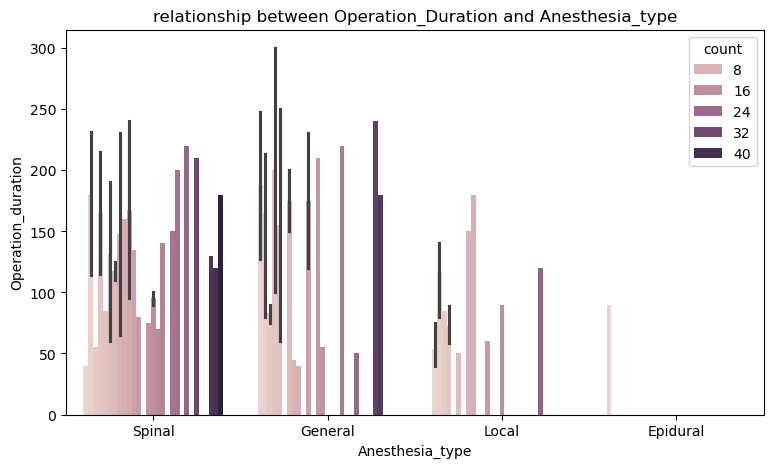

In [516]:
plt.figure(figsize = (9,5))
sn.barplot(df,x = 'Anesthesia_type', y = 'Operation_duration',hue = 'count')
plt.title('relationship between Operation_Duration and Anesthesia_type')
plt.show()

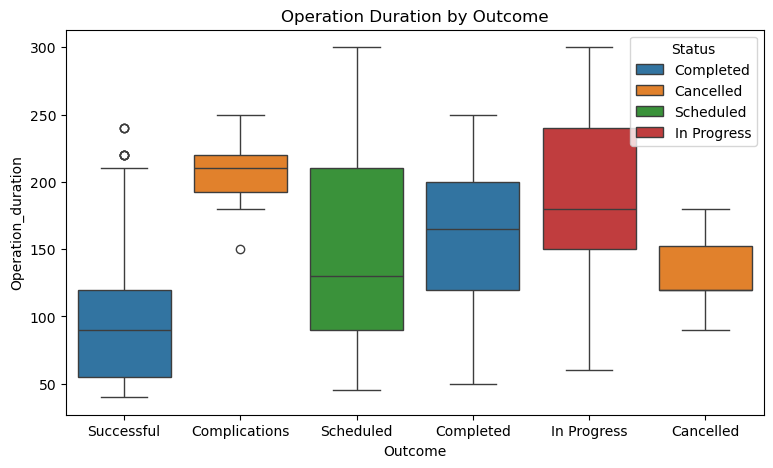

In [146]:
#2) What is the correlation between Operation_Duration and Outcome?

plt.figure(figsize = (9,5))
sn.boxplot(data, x='Outcome', y='Operation_duration',hue = 'Status')
plt.title('Operation Duration by Outcome')
plt.show()


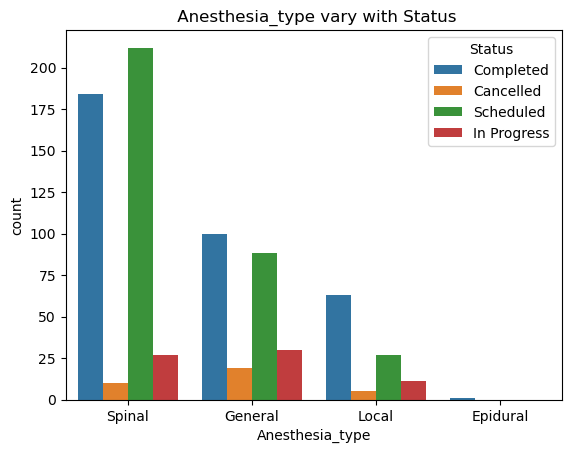

In [518]:
#3)  How does the Anesthesia_type vary with Status (completed, in progress, cancelled)?

sn.countplot(data = data,x = 'Anesthesia_type', hue = 'Status')
plt.title(' Anesthesia_type vary with Status')
plt.show()

In [148]:
#4) What is the distribution of Operation_Type across different Surgeon_IDs?
df = data[['Operation_Type','Surgeon_ID']].value_counts().reset_index()
df1 = df.head(10)
df1

,Operation_Type,Surgeon_ID,count
0,Appendectomy,110,1
1,Orthopedic Surgery,760,1
2,Orthopedic Surgery,670,1
3,Orthopedic Surgery,674,1
4,Orthopedic Surgery,678,1
5,Orthopedic Surgery,682,1
6,Orthopedic Surgery,687,1
7,Orthopedic Surgery,691,1
8,Orthopedic Surgery,695,1
9,Orthopedic Surgery,699,1


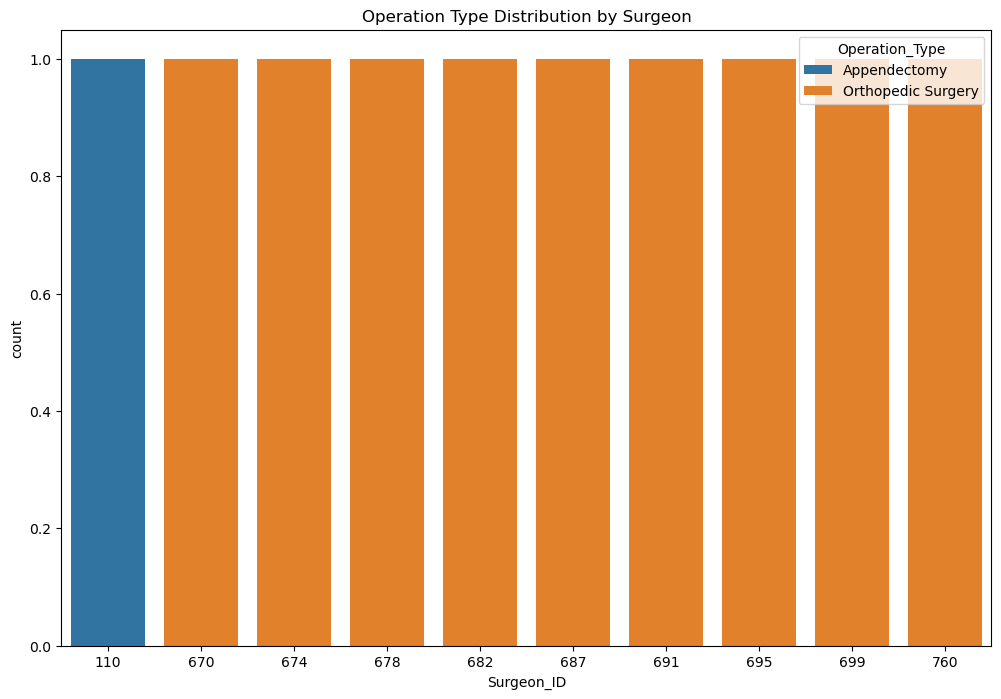

In [150]:
plt.figure(figsize=(12,8))
sn.countplot(data=df1, x='Surgeon_ID', hue='Operation_Type')
plt.title('Operation Type Distribution by Surgeon')
plt.show()

In [520]:
#retrive all data from medical_labs
mycursor.execute("select * from medical_labs")
output = mycursor.fetchall()
for x in output:
    print(x)

(1, 101, 'Blood Test', datetime.datetime(2026, 3, 1, 8, 30), 'Normal', 201, 'Completed')
(2, 102, 'X-ray', datetime.datetime(2026, 3, 2, 10, 0), 'Fracture detected', 202, 'Completed')
(3, 103, 'MRI Scan', datetime.datetime(2026, 3, 3, 12, 0), 'No abnormal findings', 203, 'Completed')
(4, 104, 'CT Scan', datetime.datetime(2026, 3, 4, 14, 0), 'Tumor detected', 204, 'Completed')
(5, 105, 'Urine Test', datetime.datetime(2026, 3, 5, 9, 0), 'Normal', 205, 'Completed')
(6, 106, 'Blood Test', datetime.datetime(2026, 3, 6, 11, 30), 'Low Hemoglobin', 206, 'Completed')
(7, 107, 'Ultrasound', datetime.datetime(2026, 3, 7, 13, 0), 'Pregnancy detected', 207, 'Completed')
(8, 108, 'Blood Test', datetime.datetime(2026, 3, 8, 15, 0), 'High Cholesterol', 208, 'Completed')
(9, 109, 'ECG', datetime.datetime(2026, 3, 9, 16, 30), 'Normal', 209, 'Completed')
(10, 110, 'X-ray', datetime.datetime(2026, 3, 10, 17, 0), 'No abnormal findings', 210, 'Completed')
(11, 111, 'Blood Test', datetime.datetime(2026, 3, 1

In [522]:
#convert all data into data frame
query = "select * from medical_labs"
data = pd.read_sql(query,db)
data.head()

,Lab_ID,Patient_ID,Test_Type,Test_Date,Test_Results,Doctor_ID,Status
0,1,101,Blood Test,2026-03-01 08:30:00,Normal,201,Completed
1,2,102,X-ray,2026-03-02 10:00:00,Fracture detected,202,Completed
2,3,103,MRI Scan,2026-03-03 12:00:00,No abnormal findings,203,Completed
3,4,104,CT Scan,2026-03-04 14:00:00,Tumor detected,204,Completed
4,5,105,Urine Test,2026-03-05 09:00:00,Normal,205,Completed


In [524]:
#describe the table
data.describe()

,Lab_ID,Patient_ID,Test_Date,Doctor_ID
count,500.000000,500.000000,500,500.000000
mean,250.500000,350.500000,2026-06-26 17:31:35.399999744,450.500000
min,1.000000,101.000000,2025-06-01 08:00:00,201.000000
25%,125.750000,225.750000,2026-03-26 09:07:30,325.750000
50%,250.500000,350.500000,2026-07-30 23:30:00,450.500000
75%,375.250000,475.250000,2026-12-03 20:37:30,575.250000
max,500.000000,600.000000,2027-04-10 10:00:00,700.000000
std,144.481833,144.481833,NaN,144.481833


In [526]:
#information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Lab_ID        500 non-null    int64         
 1   Patient_ID    500 non-null    int64         
 2   Test_Type     500 non-null    object        
 3   Test_Date     500 non-null    datetime64[ns]
 4   Test_Results  500 non-null    object        
 5   Doctor_ID     500 non-null    int64         
 6   Status        500 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 27.5+ KB


In [528]:
#shape of table
data.shape

(500, 7)

In [530]:
#columns in table
data.columns

Index(['Lab_ID', 'Patient_ID', 'Test_Type', 'Test_Date', 'Test_Results',
       'Doctor_ID', 'Status'],
      dtype='object')

In [532]:
#finding null values
data.isnull().sum()

Lab_ID          0
Patient_ID      0
Test_Type       0
Test_Date       0
Test_Results    0
Doctor_ID       0
Status          0
dtype: int64

In [534]:
#1) Is there a relationship between test results and test type?
df = data[['Test_Results','Test_Type']]
df1 = df.head(10)
df

,Test_Results,Test_Type
0,Normal,Blood Test
1,Fracture detected,X-ray
2,No abnormal findings,MRI Scan
3,Tumor detected,CT Scan
4,Normal,Urine Test
...,...,...
495,Hyperthyroidism,Blood Test
496,Cervical spine degeneration,X-Ray
497,Pulmonary issues,CT Scan
498,No significant findings,MRI


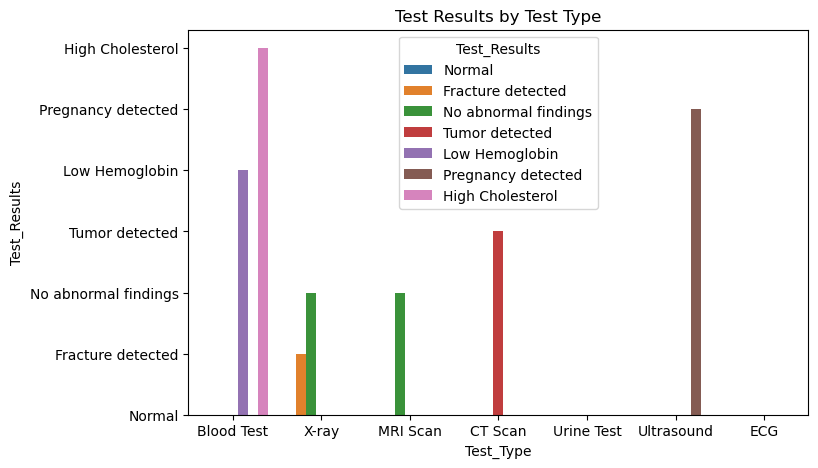

In [536]:
plt.figure(figsize = (8,5))
sn.barplot(df1,x = 'Test_Type', y = 'Test_Results',hue = 'Test_Results')
plt.gca().invert_yaxis()
plt.title('Test Results by Test Type')
plt.show()

In [538]:
#2) What is the distribution of patient statuses (e.g., "pending", "completed")?
df = data['Status'].value_counts().reset_index()
df

,Status,count
0,Completed,418
1,In Progress,68
2,Pending,14


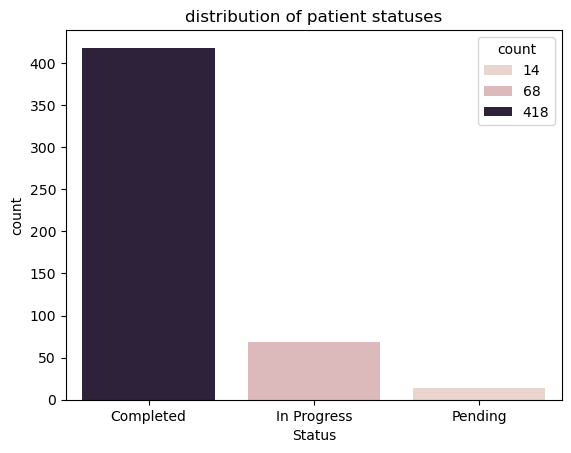

In [540]:
sn.barplot(df, x = 'Status', y = 'count',hue = 'count')
plt.title('distribution of patient statuses')
plt.show()

In [542]:
#3) What is the relationship between test results and patient status?
df = data[['Test_Results','Status']]
df1 = df.head(30)
df

,Test_Results,Status
0,Normal,Completed
1,Fracture detected,Completed
2,No abnormal findings,Completed
3,Tumor detected,Completed
4,Normal,Completed
...,...,...
495,Hyperthyroidism,Completed
496,Cervical spine degeneration,Completed
497,Pulmonary issues,Completed
498,No significant findings,In Progress


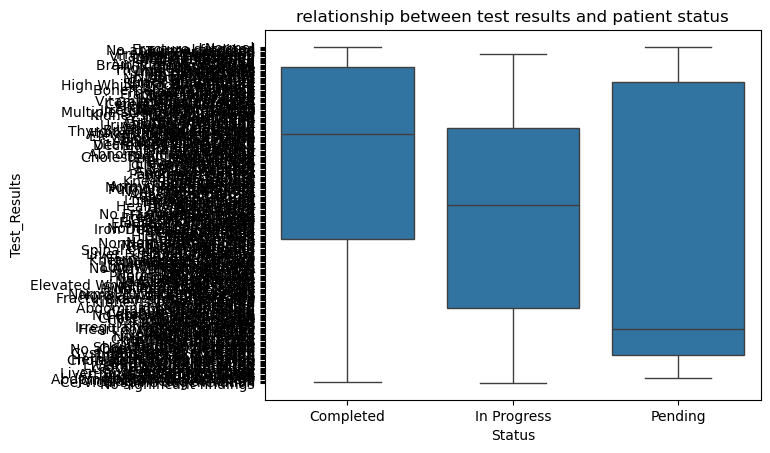

In [544]:
sn.boxplot(df,x='Status', y='Test_Results')
plt.title('relationship between test results and patient status')
plt.show()


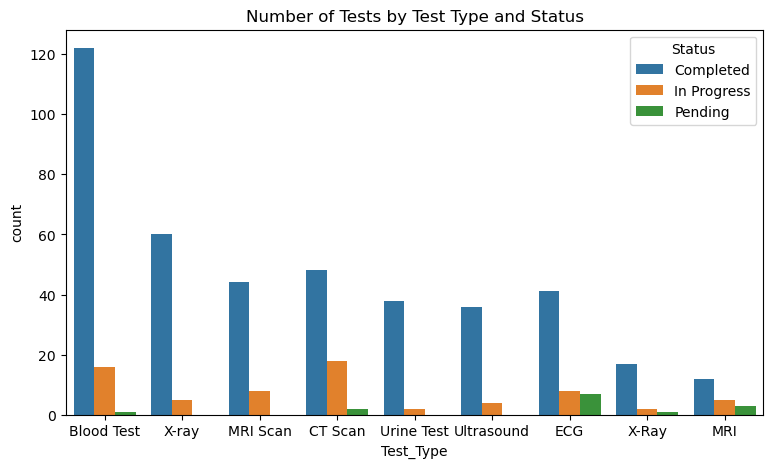

In [298]:
#4) How does the number of tests change based on test type and status?
plt.figure(figsize=(9,5))
sn.countplot(data,x='Test_Type', hue='Status')
plt.title('Number of Tests by Test Type and Status')
plt.show()


In [546]:
#retrive all data from pharmacy
mycursor.execute("select * from pharmacy")
output = mycursor.fetchall()
for x in output:
    print(x)
    

(1, 'Paracetamol', 'Pain reliever and fever reducer', '500mg', Decimal('10.50'), 120, datetime.date(2026, 11, 30), 'Painkiller', 'Cipla', 'India')
(2, 'Amoxicillin', 'Antibiotic for bacterial infections', '250mg', Decimal('18.00'), 200, datetime.date(2027, 3, 15), 'Antibiotic', "Dr. Reddy's", 'India')
(3, 'Ibuprofen', 'Anti-inflammatory and pain reliever', '200mg', Decimal('15.00'), 150, datetime.date(2025, 9, 5), 'Painkiller', 'Sun Pharma', 'India')
(4, 'Cetirizine', 'Antihistamine for allergies', '10mg', Decimal('20.00'), None, datetime.date(2026, 6, 21), 'Allergy', 'Zydus Cadila', 'India')
(5, 'Aspirin', 'Pain reliever and anti-inflammatory', '500mg', Decimal('12.50'), 130, datetime.date(2025, 7, 15), 'Painkiller', None, 'India')
(6, 'Omeprazole', 'Antacid for heartburn', '20mg', Decimal('25.00'), 110, datetime.date(2026, 12, 10), 'Antacid', 'Alkem Labs', 'India')
(7, 'Metformin', 'Used to manage type 2 diabetes', '500mg', Decimal('40.00'), 90, datetime.date(2027, 5, 5), 'Diabetes',

In [548]:
#convert all data into dataframe
query = "select * from pharmacy"
data = pd.read_sql(query,db)
data.head()

,Medicine_ID,Medicine_Name,Description,Dosage,Price,Stock_Quantity,Expiry_Date,Category,Manufacturer,Manufactured
0,1,Paracetamol,Pain reliever and fever reducer,500mg,10.5,120.0,2026-11-30,Painkiller,Cipla,India
1,2,Amoxicillin,Antibiotic for bacterial infections,250mg,18.0,200.0,2027-03-15,Antibiotic,Dr. Reddy's,India
2,3,Ibuprofen,Anti-inflammatory and pain reliever,200mg,15.0,150.0,2025-09-05,Painkiller,Sun Pharma,India
3,4,Cetirizine,Antihistamine for allergies,10mg,20.0,NaN,2026-06-21,Allergy,Zydus Cadila,India
4,5,Aspirin,Pain reliever and anti-inflammatory,500mg,12.5,130.0,2025-07-15,Painkiller,None,India


In [550]:
#describe the table
data.describe


<bound method NDFrame.describe of      Medicine_ID Medicine_Name                                Description  \
0              1   Paracetamol            Pain reliever and fever reducer   
1              2   Amoxicillin        Antibiotic for bacterial infections   
2              3     Ibuprofen        Anti-inflammatory and pain reliever   
3              4    Cetirizine                Antihistamine for allergies   
4              5       Aspirin        Pain reliever and anti-inflammatory   
..           ...           ...                                        ...   
195          196     Valsartan            Angiotensin II receptor blocker   
196          197      Warfarin           Anticoagulant for blood clotting   
197          198    Amlodipine   Calcium channel blocker for hypertension   
198          199  Azathioprine  Immunosuppressive for autoimmune diseases   
199          200      Cefixime        Antibiotic for bacterial infections   

    Dosage  Price  Stock_Quantity Expiry_

In [552]:
#information of table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Medicine_ID     200 non-null    int64  
 1   Medicine_Name   200 non-null    object 
 2   Description     200 non-null    object 
 3   Dosage          200 non-null    object 
 4   Price           197 non-null    float64
 5   Stock_Quantity  196 non-null    float64
 6   Expiry_Date     200 non-null    object 
 7   Category        200 non-null    object 
 8   Manufacturer    186 non-null    object 
 9   Manufactured    181 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 15.8+ KB


In [554]:
#shape of table
data.shape

(200, 10)

In [556]:
#columns in table
data.columns

Index(['Medicine_ID', 'Medicine_Name', 'Description', 'Dosage', 'Price',
       'Stock_Quantity', 'Expiry_Date', 'Category', 'Manufacturer',
       'Manufactured'],
      dtype='object')

In [558]:
#finding null values
data.isnull().sum()

Medicine_ID        0
Medicine_Name      0
Description        0
Dosage             0
Price              3
Stock_Quantity     4
Expiry_Date        0
Category           0
Manufacturer      14
Manufactured      19
dtype: int64

In [560]:
#fillng null values
data.fillna(method = 'ffill',inplace = True)
data.isnull().sum()

Medicine_ID       0
Medicine_Name     0
Description       0
Dosage            0
Price             0
Stock_Quantity    0
Expiry_Date       0
Category          0
Manufacturer      0
Manufactured      0
dtype: int64

In [562]:
#1) How many medicines are in each category?
df = data['Category'].value_counts().reset_index()
df

,Category,count
0,Cardiovascular,44
1,Psychiatric,27
2,Antibiotic,24
3,Painkiller,14
4,Neurology,13
5,Antacid,13
6,Allergy,11
7,Diabetes,8
8,Sexual Health,7
9,Respiratory,6


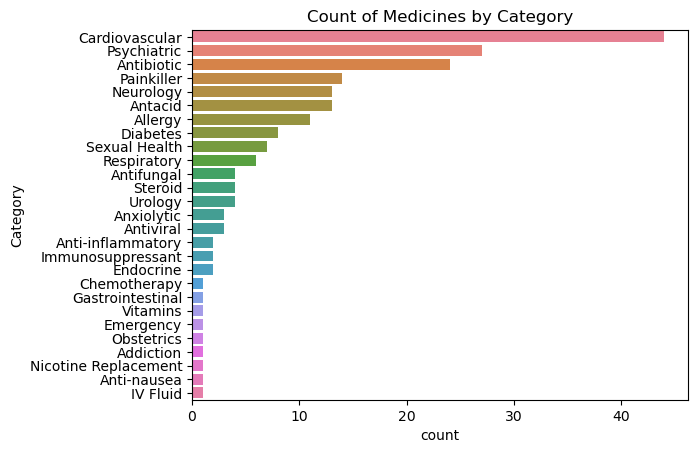

In [564]:
sn.barplot(df,y='Category',x = 'count',hue = 'Category')
plt.title('Count of Medicines by Category')
plt.show()


In [342]:
#2) How does the stock quantity vary across manufacturers?
df = data[['Stock_Quantity','Manufacturer']]
df1 = df.head(20)
df

,Stock_Quantity,Manufacturer
0,120.0,Cipla
1,200.0,Dr. Reddy's
2,150.0,Sun Pharma
3,150.0,Zydus Cadila
4,130.0,Zydus Cadila
...,...,...
195,110.0,Sun Pharma
196,60.0,Alkem Labs
197,100.0,Alkem Labs
198,50.0,Cipla


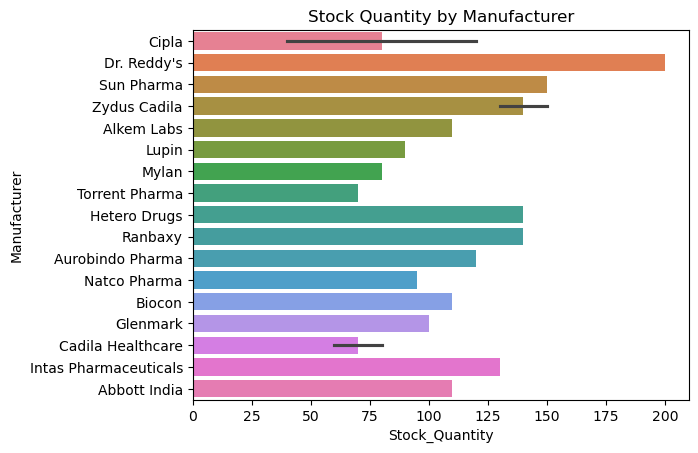

In [352]:
sn.barplot(df1,y='Manufacturer', x='Stock_Quantity',hue = 'Manufacturer')
plt.title('Stock Quantity by Manufacturer')
plt.show()


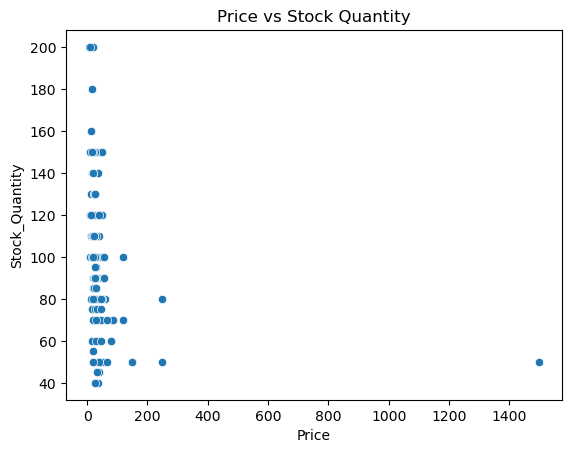

In [356]:
#3) What is the relationship between price and stock quantity?
sn.scatterplot(data,x='Price', y='Stock_Quantity')
plt.title('Price vs Stock Quantity')
plt.show()


In [362]:
#4) is there any correlation between price and stock quantity?
df = data[['Price','Stock_Quantity']].corr()
df

,Price,Stock_Quantity
Price,1.000000,-0.198739
Stock_Quantity,-0.198739,1.000000


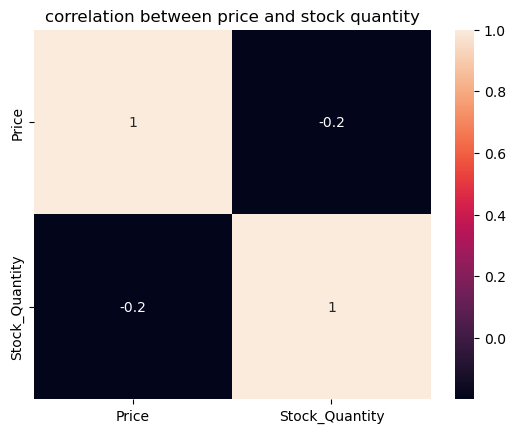

In [368]:
sn.heatmap(df, annot = True)
plt.title('correlation between price and stock quantity')
plt.show()

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')